In [1]:
import iris
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import datetime
import numpy as np
import iris.coords as icoords
import iris.coord_categorisation
import iris.quickplot as qplt 
import numpy.ma as ma
from iris.util import broadcast_to_shape

In [2]:
#defining a function to calculate global average T
def area_average(cube):
    
    if cube.coord('latitude').bounds is None:
        cube.coord('latitude').guess_bounds()
        cube.coord('longitude').guess_bounds()
    
    grid_areas = iris.analysis.cartography.area_weights(cube)
    average = cube.collapsed(['latitude','longitude'],iris.analysis.MEAN, weights=grid_areas)
    
    return average

In [3]:
#defining function to merge cube list into single large cube
def time_reset(cubes): 
    
    time_coord = cubes[0].coord('time')
    n=1
    for cube in cubes:
        cube.remove_coord('time')
        cube.add_dim_coord(time_coord,0)
        cube.remove_coord('forecast_reference_time')
        cube.remove_coord('forecast_period')
        n+=1
    
    return 

In [4]:
#defining function to merge cube list into single large cube
def time_reset_again(cubes): 
    
    time_coord = cubes[0].coord('time')
    n=1
    for cube in cubes:
        cube.remove_coord('time')
        cube.add_dim_coord(time_coord,0)
        n+=1
    
    return 

In [5]:
#defining function to merge cube list into single large cube
def merge_cubes(cubes): 
    
    """
    Merge all ensemble members into one cube
    All cubes given the same time coordinate
    """

    big_cube = iris.cube.CubeList()
    n=1
    for cube in cubes:
        ensemble_coord = icoords.AuxCoord(n, standard_name='realization')
        new_cube = cube.copy()
        new_cube.add_aux_coord(ensemble_coord)
        big_cube.append(new_cube)
        n+=1
    
    return big_cube.merge_cube()

In [6]:
#defining function to merge cube list into single large cube
def merge_cubes_again(cubes): 
    
    """
    Merge all ensemble members into one cube
    All cubes given the same time coordinate
    """

    big_cube = iris.cube.CubeList()
    for cube in cubes:
        new_cube = cube.copy()
        big_cube.append(new_cube)
    
    return big_cube.merge_cube()

In [7]:
#setting file path and ensemble codes
dir_in_coupled = '/shared/netscratch/lrm49/Laura/'
coupled_cntl = ['u-bu651','u-bv666','u-bv668','u-bv669','u-bv670','u-bv674','u-bv676','u-bv677','u-bv678']
july_el = ['u-bw764'] 
july_la = ['u-bw758', 'u-bw761', 'u-bw762', 'u-bw766'] 
july_ne = ['u-bv020', 'u-bw763', 'u-bw765', 'u-bw767']
jan_el = ['u-ca322', 'u-ca325', 'u-ca331'] 
jan_la = ['u-ca323', 'u-ca324', 'u-ca326', 'u-ca328'] 
jan_ne = ['u-ca327', 'u-ca330' ]

In [8]:
#ENSO 3.4 INDEX LAT AND LONG 
nino_constraint = iris.Constraint(longitude=lambda v: -170+360 <= v <= -120+360,latitude=lambda v: -5 <= v <= 5)

In [9]:
sat_elnino = iris.cube.CubeList()
for job_id in july_el:

    dynamic_cube = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    time_limit = sst_cube[6:120]
    enso = time_limit.extract(nino_constraint)
    area_av = area_average(enso)

    sat_elnino.append(area_av)
    
for job_id in jan_el:
    
    dynamic_cube = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    time_limit = sst_cube[0:114]
    enso = time_limit.extract(nino_constraint)
    area_av = area_average(enso)

    sat_elnino.append(area_av)

In [10]:
sat_lanina = iris.cube.CubeList()
for job_id in july_la:

    dynamic_cube = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    time_limit = sst_cube[6:120]
    enso = time_limit.extract(nino_constraint)
    area_av = area_average(enso)

    sat_lanina.append(area_av)
    
for job_id in jan_la:
    
    dynamic_cube = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    time_limit = sst_cube[0:114]
    enso = time_limit.extract(nino_constraint)
    area_av = area_average(enso)

    sat_lanina.append(area_av)

In [11]:
sat_neutral = iris.cube.CubeList()
for job_id in july_ne:

    dynamic_cube = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    time_limit = sst_cube[6:120]
    enso = time_limit.extract(nino_constraint)
    area_av = area_average(enso)

    sat_neutral.append(area_av)
    
for job_id in jan_ne:
    
    dynamic_cube = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    time_limit = sst_cube[0:114]
    enso = time_limit.extract(nino_constraint)
    area_av = area_average(enso)

    sat_neutral.append(area_av)

In [12]:
## CONTROL ## 
control = iris.cube.CubeList()
for job_id_2 in coupled_cntl:

    control_cube = iris.load(dir_in_coupled+'Control/'+job_id_2+'_dynamics_vars.nc')
    sst_control = control_cube.extract('surface_temperature')[0]
    enso = sst_control.extract(nino_constraint)
    area_av = area_average(enso)

    control.append(area_av)

In [13]:
time_reset(sat_elnino)
time_reset(sat_lanina)
time_reset(sat_neutral)
time_reset(control)

In [14]:
sat_merged_elnino = merge_cubes(sat_elnino)
sat_merged_lanina = merge_cubes(sat_lanina)
sat_merged_neutral = merge_cubes(sat_neutral)
one_big_control = merge_cubes(control)

In [15]:
#Creating control ensemble average
mean_control = one_big_control.collapsed('realization',iris.analysis.MEAN)

/home/lw602/.conda/envs/py27iris/lib/python2.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'realization'.
  warnings.warn(msg.format(self.name()))


In [16]:
#Creating 10 year climatology
import iris.coord_categorisation
iris.coord_categorisation.add_month(mean_control,'time',name='month')
climatology_all_controls = mean_control.aggregated_by('month',iris.analysis.MEAN) 
climatology_long = np.tile(climatology_all_controls.data, 10)
climatology_short_1 = climatology_long[6:120]#comaptible with july ensembles
climatology_short_2 = climatology_long[0:114]#comaptible with jan ensembles


In [17]:
anomally = one_big_control - climatology_long

In [18]:
anom_elnino = iris.cube.CubeList()

for i in range(0,1):
    anomally_elnino = sat_merged_elnino[i] - climatology_short_1
    anom_elnino.append(anomally_elnino)

for i in range(1,4):
    anomally_elnino = sat_merged_elnino[i] - climatology_short_2
    anom_elnino.append(anomally_elnino)

In [19]:
anom_lanina = iris.cube.CubeList()

for i in range(0,4):
    anomally_lanina = sat_merged_lanina[i] - climatology_short_1
    anom_lanina.append(anomally_lanina)

for i in range(4,8):
    anomally_lanina = sat_merged_lanina[i] - climatology_short_2
    anom_lanina.append(anomally_lanina)

In [20]:
anom_neutral = iris.cube.CubeList()

for i in range(0,4):
    anomally_neutral = sat_merged_neutral[i] - climatology_short_1
    anom_neutral.append(anomally_neutral)

for i in range(4,6):
    anomally_neutral = sat_merged_neutral[i] - climatology_short_2
    anom_neutral.append(anomally_neutral)

In [21]:
anom_elnino_full = merge_cubes_again(anom_elnino)
anom_lanina_full = merge_cubes_again(anom_lanina)
anom_neutral_full = merge_cubes_again(anom_neutral)

In [22]:
## Calculating anomaly pertubations ## 

pert_el = iris.cube.CubeList()
a = anom_elnino_full[0] - anomally[5][6:120].data#
b = anom_elnino_full[1] - anomally[0][0:114].data
c = anom_elnino_full[2] - anomally[3][0:114].data
d = anom_elnino_full[3] - anomally[8][0:114].data
pert_el.append(a)
pert_el.append(b)
pert_el.append(c)
pert_el.append(d)

pert_la = iris.cube.CubeList()
a = anom_lanina_full[0] - anomally[1][6:120].data#
b = anom_lanina_full[1] - anomally[2][6:120].data
c = anom_lanina_full[2] - anomally[3][6:120].data
d = anom_lanina_full[3] - anomally[7][6:120].data
e = anom_lanina_full[4] - anomally[1][0:114].data
f = anom_lanina_full[5] - anomally[2][0:114].data
g = anom_lanina_full[6] - anomally[4][0:114].data
h = anom_lanina_full[7] - anomally[6][0:114].data
pert_la.append(a)
pert_la.append(b)
pert_la.append(c)
pert_la.append(d)
pert_la.append(e)
pert_la.append(f)
pert_la.append(g)
pert_la.append(h)

pert_ne = iris.cube.CubeList()
a = anom_neutral_full[0] - anomally[0][6:120].data#
b = anom_neutral_full[1] - anomally[4][6:120].data
c = anom_neutral_full[2] - anomally[6][6:120].data
d = anom_neutral_full[3] - anomally[8][6:120].data
e = anom_neutral_full[4] - anomally[5][0:114].data
f = anom_neutral_full[5] - anomally[7][0:114].data
pert_ne.append(a)
pert_ne.append(b)
pert_ne.append(c)
pert_ne.append(d)
pert_ne.append(e)
pert_ne.append(f)

pert_ne[0]

<iris 'Cube' of unknown / (K) (time: 114)>

In [23]:
time_reset_again(pert_el)
time_reset_again(pert_la)
time_reset_again(pert_ne)

In [24]:
pert_elnino_full = merge_cubes_again(pert_el)
pert_lanina_full = merge_cubes_again(pert_la)
pert_neutral_full = merge_cubes_again(pert_ne)

In [25]:
#Taking ensemble mean anomalies
mean_anomally_elnino = anom_elnino_full.collapsed('realization',iris.analysis.MEAN)
mean_anomally_lanina = anom_lanina_full.collapsed('realization',iris.analysis.MEAN)
mean_anomally_neutral = anom_neutral_full.collapsed('realization',iris.analysis.MEAN)

In [26]:
#Taking ensemble mean anomaly pertubations
mean_pert_elnino = pert_elnino_full.collapsed('realization',iris.analysis.MEAN)
mean_pert_lanina = pert_lanina_full.collapsed('realization',iris.analysis.MEAN)
mean_pert_neutral = pert_neutral_full.collapsed('realization',iris.analysis.MEAN)

In [27]:
time = range(0,114)

zero = []

for i in range(0,114):
    i = 0
    zero.append(i)

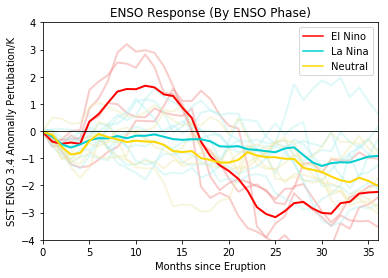

In [28]:
from matplotlib.lines import Line2D

for cube in pert_elnino_full.slices_over('realization'): # loop through ensemble members
    
    plt.plot(time, cube.data, color='lightcoral', alpha = 0.4, lw=2)#plotting mean

for cube in pert_lanina_full.slices_over('realization'): # loop through ensemble members
    
    plt.plot(time, cube.data, color='paleturquoise', alpha = 0.4, lw=2)#plotting mean
    
for cube in pert_neutral_full.slices_over('realization'): # loop through ensemble members
    
    plt.plot(time, cube.data, color='palegoldenrod', alpha = 0.4, lw=2)#plotting mean
    
plt.plot(time, mean_pert_elnino.data, color='red',lw=2)
plt.plot(time, mean_pert_lanina.data, color='darkturquoise',lw=2)
plt.plot(time, mean_pert_neutral.data, color='gold',lw=2)

plt.plot(time, zero, color='black', lw = 1, linestyle='-', alpha = 0.8)

plt.xlabel('Months since Eruption')
plt.ylabel('SST ENSO 3.4 Anomally Pertubation/K')
plt.xlim(time[0],time[36])
plt.ylim(-4,4)
elnino_line = Line2D([0], [0], label='El Nino', color='red')
lanina_line = Line2D([0], [0], label='La Nina', color='darkturquoise')
neutral_line = Line2D([0], [0], label='Neutral', color='gold')
plt.legend(handles=[elnino_line, lanina_line, neutral_line])
plt.title('ENSO Response (By ENSO Phase)')

plt.savefig('ENSO_pertubation_by_ENSO.pdf')

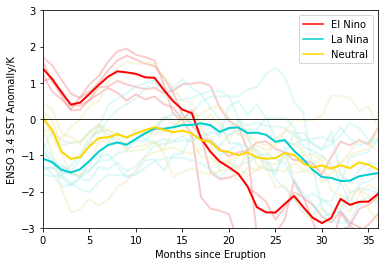

In [29]:
from matplotlib.lines import Line2D

for cube in anom_elnino_full.slices_over('realization'): # loop through ensemble members
    
    plt.plot(time, cube.data, color='lightcoral', alpha = 0.4, lw=2)#plotting mean

for cube in anom_lanina_full.slices_over('realization'): # loop through ensemble members
    
    plt.plot(time, cube.data, color='paleturquoise', alpha = 0.4, lw=2)#plotting mean
    
for cube in anom_neutral_full.slices_over('realization'): # loop through ensemble members
    
    plt.plot(time, cube.data, color='palegoldenrod', alpha = 0.4, lw=2)#plotting mean
    
plt.plot(time, mean_anomally_elnino.data, color='red',lw=2)
plt.plot(time, mean_anomally_lanina.data, color='darkturquoise',lw=2)
plt.plot(time, mean_anomally_neutral.data, color='gold',lw=2)

plt.plot(time, zero, color='black', lw = 1, linestyle='-', alpha = 0.8)

plt.xlabel('Months since Eruption')
plt.ylabel('ENSO 3.4 SST Anomally/K')
plt.xlim(time[0],time[36])
plt.ylim(-3,3)
elnino_line = Line2D([0], [0], label='El Nino', color='red')
lanina_line = Line2D([0], [0], label='La Nina', color='darkturquoise')
neutral_line = Line2D([0], [0], label='Neutral', color='gold')
plt.legend(handles=[elnino_line, lanina_line, neutral_line])

plt.savefig('ENSO_pertubation_by_ENSO_ABSOLUTE.pdf')